# Plot raw data


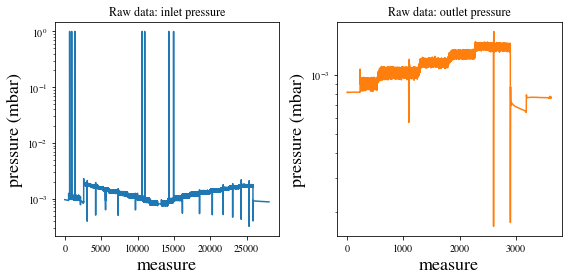

In [148]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"

pin = np.loadtxt(open("pin.csv"))
pout = np.loadtxt(open("pout.csv"))

fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('Raw data: inlet pressure')
plt.plot(pin[:,0],pin[:,1])
plt.xlabel("measure",fontsize=18)
plt.ylabel("pressure (mbar)",fontsize=18)
plt.yscale("log")
plt.subplot(1,2,2)
plt.title('Raw data: outlet pressure')
plt.plot(pout[:,0],pout[:,1],color='tab:orange')
plt.xlabel("measure",fontsize=18)
plt.ylabel("pressure (mbar)",fontsize=18)
plt.yscale("log")
fig.tight_layout()
plt.savefig('rawP.pdf')

# Clean-up the data and plot

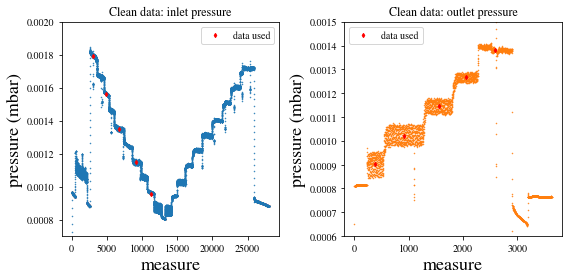

In [149]:
from scipy.signal import lfilter
# clean the data 
n = 5
n1 = 20
b = [1.0 / n] * n
b1 = [1.0 / n1] * n1
a = 1
poutClean = lfilter(b,a,pout[:,1])
pinClean = lfilter(b1,a,pin[:,1])
#take the mean value for each Q (interval chose by hand)
q_in_500_a = np.mean(pinClean[2680:3445])
q_in_400_a = np.mean(pinClean[4657:5158])
q_in_300_a = np.mean(pinClean[6133:7240])
q_in_200_a = np.mean(pinClean[8741:9611])
q_in_100_a = np.mean(pinClean[11623:11640])

q_out_500 = np.mean(poutClean[2303:2883])
q_out_400 = np.mean(poutClean[1859:2256])
q_out_300 = np.mean(poutClean[1325:1780])
q_out_200 = np.mean(poutClean[600:1228])
q_out_100 = np.mean(poutClean[243:519])
#wrap everything
mean_P_in = np.array([q_in_500_a,q_in_400_a,q_in_300_a,q_in_200_a,q_in_100_a])
mean_P_out = np.array([q_out_500,q_out_400,q_out_300,q_out_200,q_out_100])
q_list_in = np.array([(3445+2680)/2 ,(4657+5158)/2, (6133+7240)/2, (8741+9611)/2, (10849+11610)/2])
q_list_out = np.array([(2303+2883)/2 ,(1859+2256)/2, (1325+1780)/2, (600+1228)/2, (243+519)/2])
#plot
fig1 = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('Clean data: inlet pressure')
plt.plot(pin[:,0],pinClean,'o',ms=0.5)
plt.plot(q_list_in,mean_P_in,'rd',ms=3,label='data used')
plt.ylim(7e-4,2e-3)
plt.xlabel("measure",fontsize=18)
plt.ylabel("pressure (mbar)",fontsize=18)
plt.legend()

plt.subplot(1,2,2)
plt.title('Clean data: outlet pressure')
plt.plot(pout[:,0],poutClean,'o',ms=0.5,color='tab:orange')
plt.plot(q_list_out,mean_P_out,'rd',ms=3,label='data used')
plt.ylim(6e-4,1.5e-3)
plt.xlabel("measure",fontsize=18)
plt.ylabel("pressure (mbar)",fontsize=18)
plt.legend()

fig1.tight_layout()
plt.savefig('cleanP.pdf')

# Compute $K$

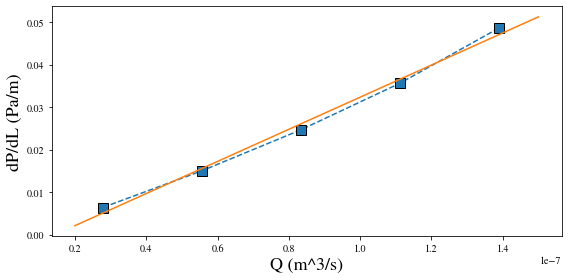

In [143]:
from scipy import stats
q_list = np.array([500, 400, 300, 200, 100])
deltaP = mean_P_in - mean_P_out
L = 0.84 #column length
slope = stats.linregress(q_list*2.777e-10,deltaP/L*100) # Q in m3/s (1 ml/h = 2.77e-10 m3/s) and dP/dL in Pa/m (1mbar = 100 Pa)
q = np.linspace(2e-8,1.5e-7,100)

fig2 = plt.figure(figsize=(8,4))
plt.plot(q_list*2.777e-10,deltaP/0.84*100,'--s',mec='k',ms=10)
plt.plot(q,q*slope[0]+slope[1],'-')
plt.xlabel('Q (m^3/s)',fontsize=18)
plt.ylabel('dP/dL (Pa/m)',fontsize=18)
fig2.tight_layout()

$$\frac{dP}{dL}=s Q$$
$$s = \frac{\mu}{AK}$$
so $$K = \frac{\mu}{As}$$

In [144]:
A = 4e-2**2 * np.pi / 4
visc = 1e-3
K = visc / slope[0] / A 
K #wtf!

2.104574404731545e-06